In [63]:
# Import necessary libraries
import imageio
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.ndimage import binary_opening, binary_closing, gaussian_filter, median_filter, morphological_gradient, binary_erosion
from scipy import ndimage

In [64]:
# Path to the images
image_folder = "../Data/Week2/qsd2_w2/qsd2_w1/"  # Update this path as necessary
image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg')]
mask_files = [f for f in os.listdir(image_folder) if f.endswith('.png')]
image_files.sort()
mask_files.sort()

In [65]:
def rgb2gray(image):
    """Convert an RGB image to grayscale."""
    # Normalize RGB values to [0, 1]
    image = image / 255.0

    # Apply the standard RGB-to-grayscale formula:
    # Luminance = 0.2989 * R + 0.5870 * G + 0.1140 * B
    gray_image = 0.2989 * image[..., 0] + 0.5870 * image[..., 1] + 0.1140 * image[..., 2]

    # Ensure values are in [0, 255] range
    gray_image = np.clip(gray_image * 255, 0, 255).astype(np.uint8)
    
    return gray_image

In [ ]:
def remove_background_morphological_gradient(image_path, filter=None):
    # Read the image
    im = imageio.imread(image_path)

    # 0. Preprocess with a Gaussian filter to reduce noise (optional)
    if filter=='gaussian':
        im = gaussian_filter(im, sigma=1)
    elif filter=='median':
        im = median_filter(im, size=3)
    # else no filtering
    
    # 1. Convert from RGB to grayscale
    im_gray = rgb2gray(im)  # Converts to 0-1 range grayscale image

    # 2. Compute morphological gradient to see gradient changes
    grad = morphological_gradient(im_gray, structure=np.ones((5, 5)))

    # 3. Thresholding to highlight the edges
    n = 0.15 # hyperparameter
    threshold = np.max(grad) * n 
    grad_bin = grad > threshold

    # 4. Opening to erase small objects
    mask = binary_opening(grad_bin, structure=np.ones((5, 5)))
    # Erase small vertical lines
    mask = binary_opening(mask, structure=np.ones((1, 4)))
    # Opening and closing to erase large horizontal lines and small vertical lines
    mask = binary_opening(mask, structure=np.ones((45, 1)))
    mask = binary_closing(mask, structure=np.ones((45, 1)))
    
    # Testing purpose
    plt.imshow(mask, cmap="gray")
    plt.show

    # 5. Find the rectangular shape
    # Find the coordinates of the edges in the binary image
    rows = np.any(mask, axis=1)
    cols = np.any(mask, axis=0)

    # Identify the boundaries (min and max) of the rectangular shape
    row_min, row_max = np.min(np.where(rows)[0]), np.max(np.where(rows)[0])
    col_min, col_max = np.min(np.where(cols)[0]), np.max(np.where(cols)[0])

    # Create a mask around the rectangle
    mask = np.zeros_like(grad_bin, dtype=np.uint8)
    mask[row_min:row_max+1, col_min:col_max+1] = 1
    
    # Apply mask to the image
    output_image = im * mask[:, :, np.newaxis]

    return im, mask, output_image

C:\Users\pml03\AppData\Local\Temp\ipykernel_7660\2621125180.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(image_path)


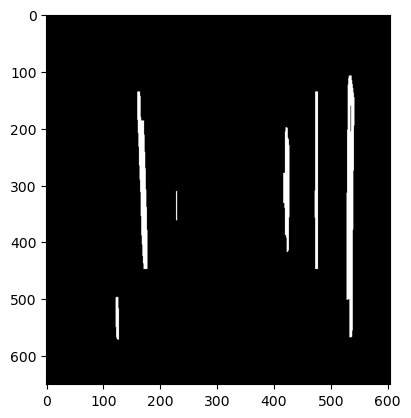

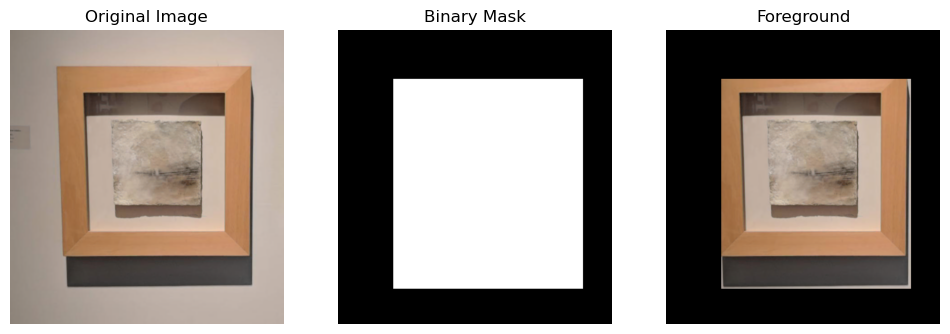

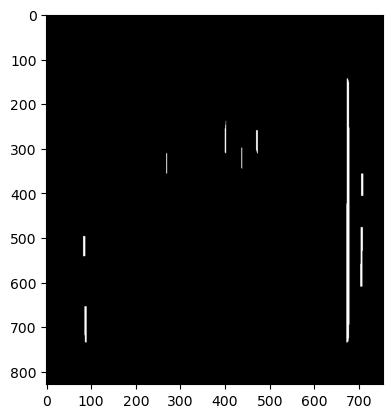

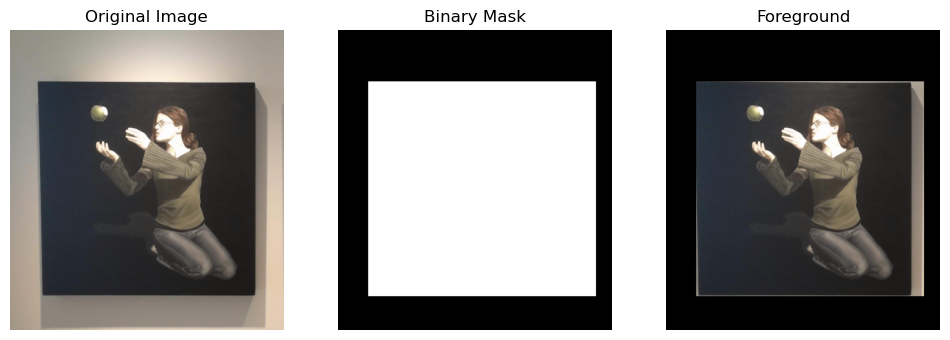

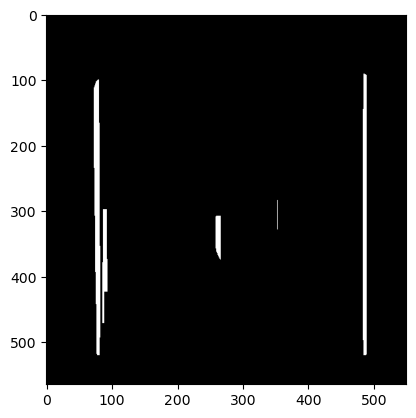

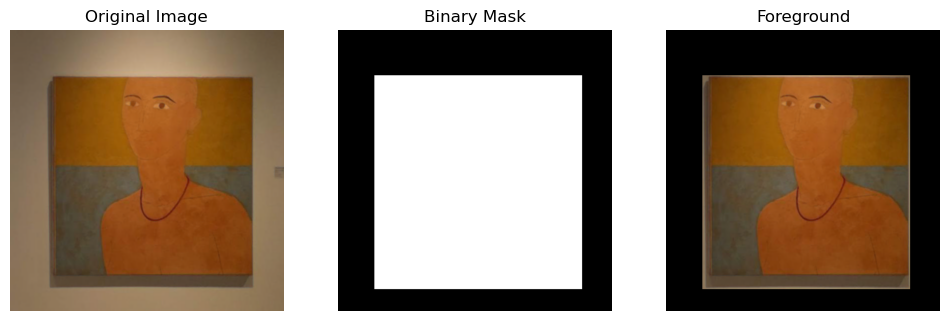

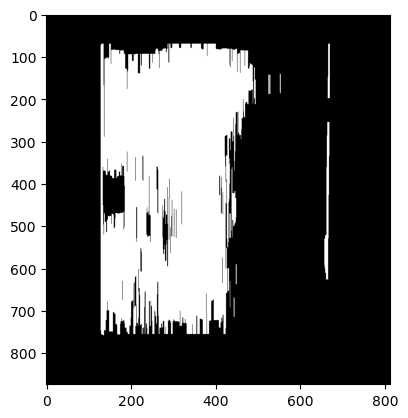

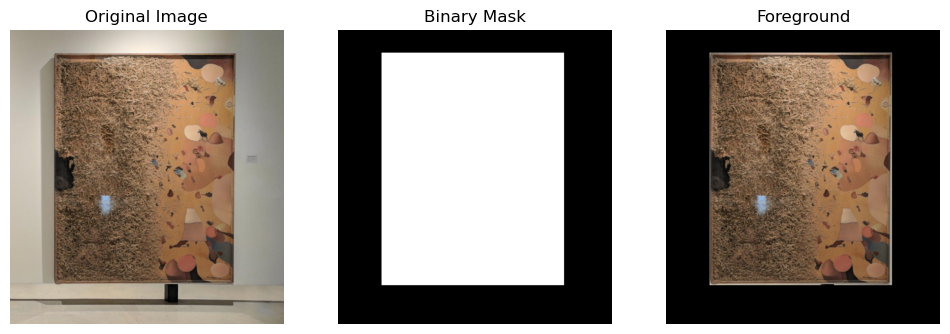

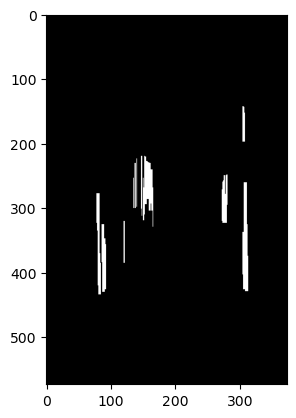

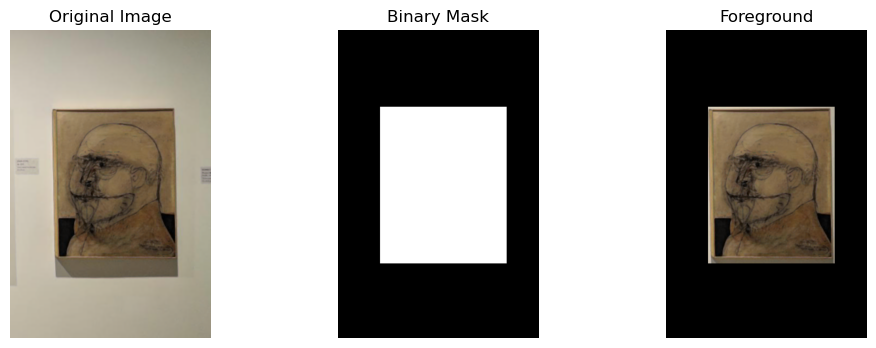

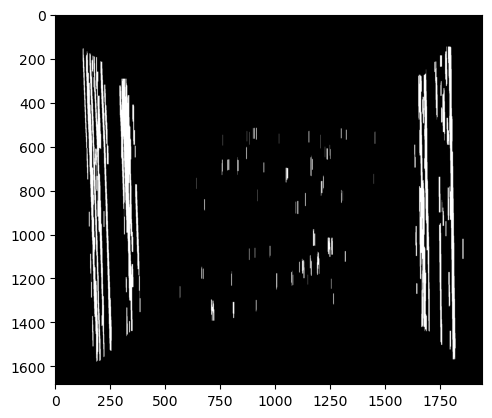

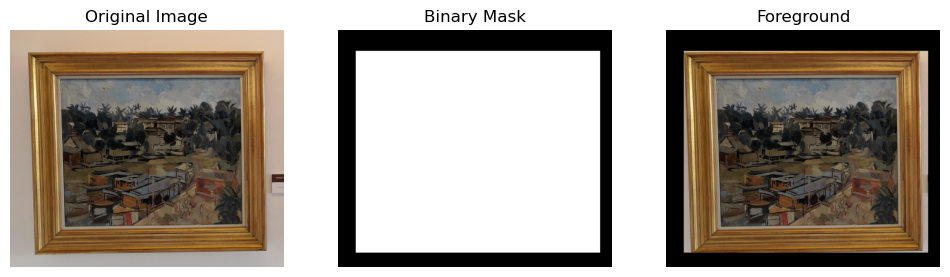

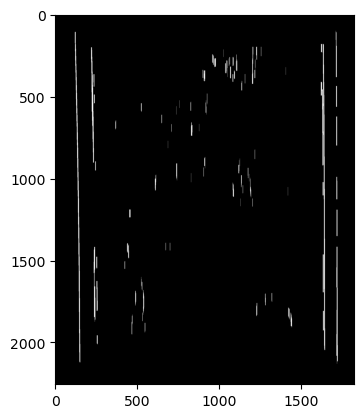

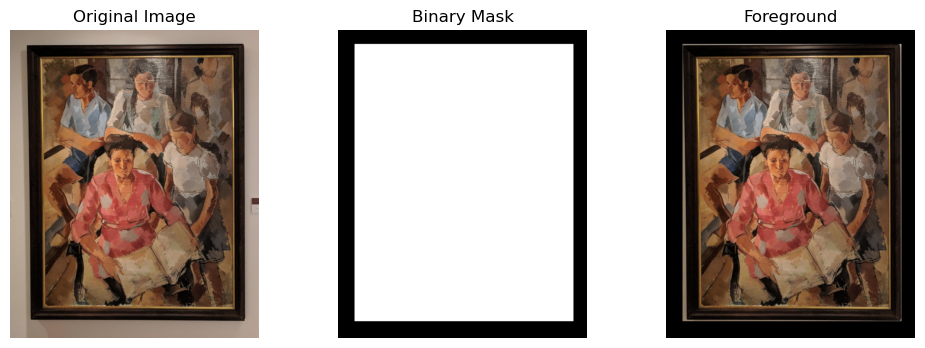

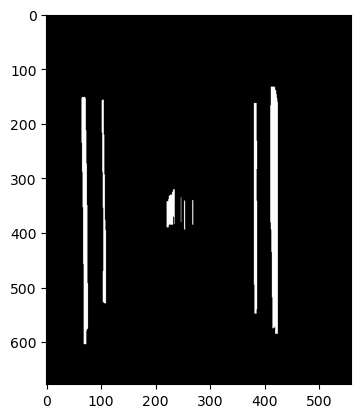

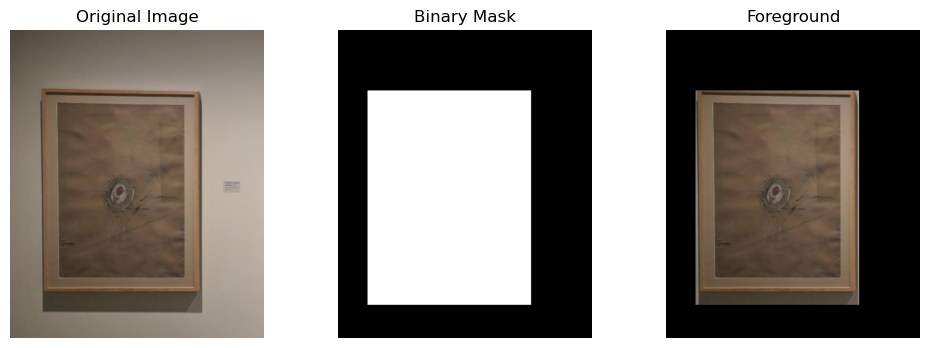

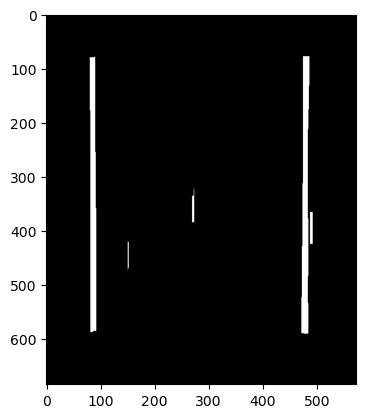

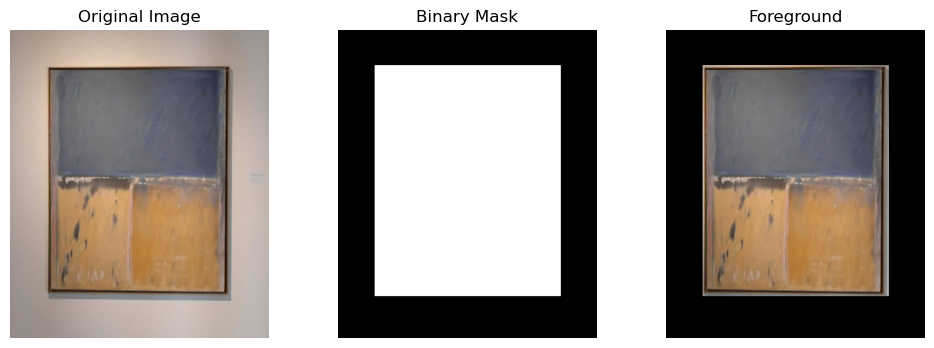

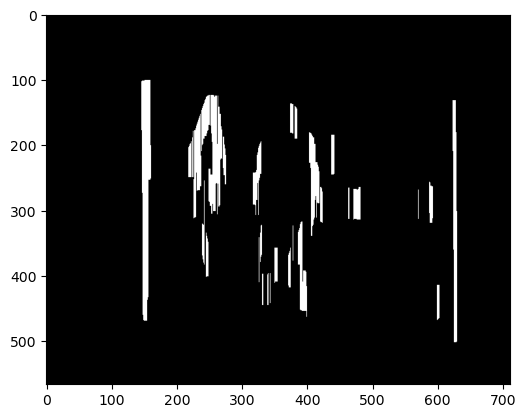

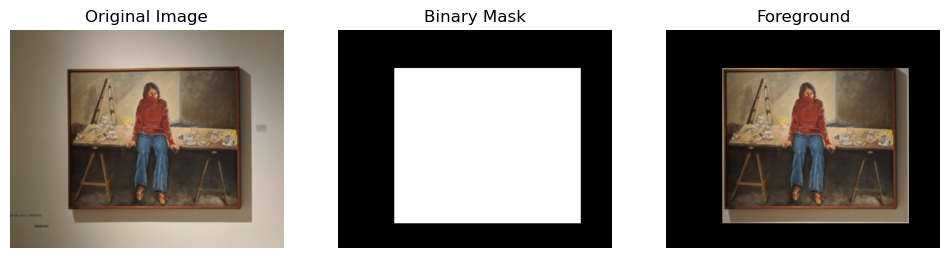

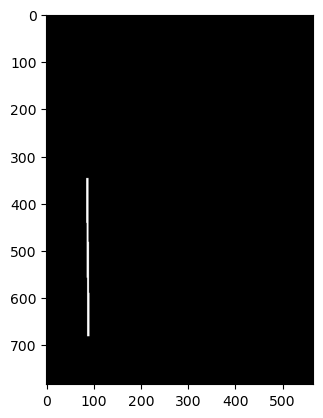

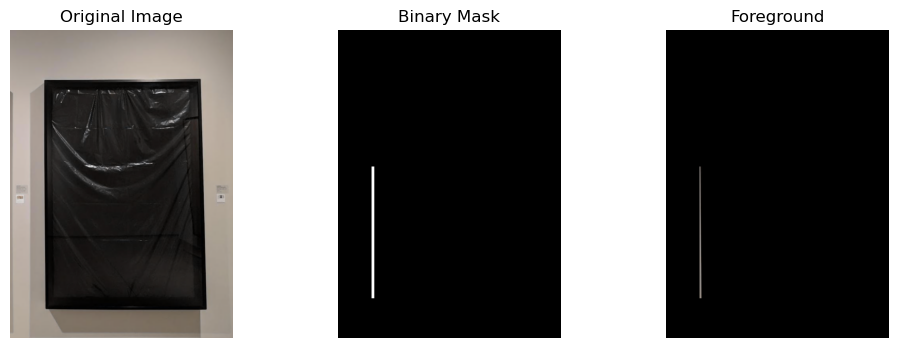

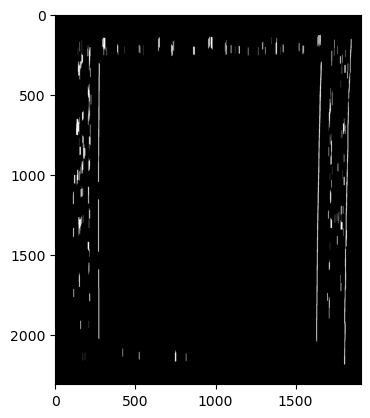

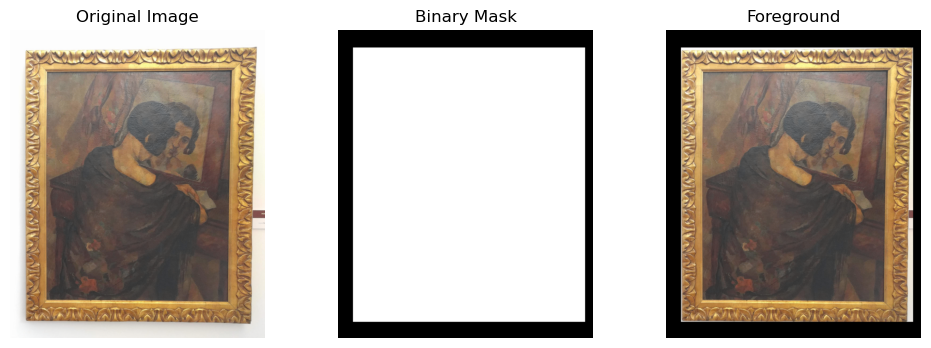

KeyboardInterrupt: 

In [94]:
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    original_image, mask, foreground = remove_background_morphological_gradient(image_path, filter='median')
    
    # Display the results
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(original_image)
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.title("Binary Mask")
    plt.imshow(mask, cmap='gray')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.title("Foreground")
    plt.imshow(foreground)
    plt.axis('off')
    
    plt.show()